In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
mpl.rcParams.update({'font.size': 15})

In [2]:
DATA = pd.read_excel('PTResults-1000.xlsx') # big dataset

param = DATA.iloc[:,1:6].to_numpy() # features
data = DATA.iloc[:, 6:].to_numpy()  # labels

nGroups = 10                    # number of groups
panels = DATA.iloc[4,6:].size # number of cells
nK = 6                        # number of NN algorithms tried (NN1, NN3, NN5, NN7, NN9, NN11)
SCORE = 'recall'


# variable to store the number of wrong predictions for each panel and each 
# NN algorithm (used to compute standard deviation)
str = np.empty([panels,nGroups,nK])


# accumulation variable for error on each panel
errPanel = np.empty([panels,nK])
for i in range(panels):
    for j in range(nK):
        errPanel[i,j] = 0

# initialization of the classifiers
NN1  = KNeighborsClassifier(n_neighbors=7)
NN3  = KNeighborsClassifier(n_neighbors=9)
NN5  = KNeighborsClassifier(n_neighbors=11)
NN7  = KNeighborsClassifier(n_neighbors=13)
NN9  = KNeighborsClassifier(n_neighbors=15)
NN11 = KNeighborsClassifier(n_neighbors=17)

labels = ['NN7','NN9','NN11','NN13','NN15','NN17']
# labels = ['DT']

counter = 0   # counts data shuffles
for rs in range(1):

    counter = counter+1

    # split the data samples randomly between training and testing (85/15)
#     np.random.seed(rs)
#     train_data, test_data, train_param, test_param = train_test_split(data, param, test_size=0.15, random_state=rs)
#     nTest  = test_data[:,1].size     # number of testing samples
#     nTrain  = train_data[:,1].size     # number of training samples
    nSamples = data[:,5].size

    
    print("Run #",counter)
    
    # variable storing predicted labels for each NN algorithm
    pred = np.empty([nK,nGroups])

    # training classifiers for each cell
    for p in range(panels):
        print('panel ',p+1)

#         dTrain = train_data[:,p]  # training data
#         dTest  = test_data[:,p]   # test data
        
        # skip cells where there is always the same label
        if (data[:,p].sum() == 0):
            str[p,counter-1,:] = 0
            errPanel[p,:] = 0
            continue
            

        pred[0,:] = cross_val_score(NN1, param, data[:,p], cv=10, scoring=SCORE)
#         print(param.shape)
#         print(data[:,p].shape)

        pred[1,:] = cross_val_score(NN3, param, data[:,p], cv=10, scoring=SCORE)

        pred[2,:] = cross_val_score(NN5, param, data[:,p], cv=10, scoring=SCORE)

        pred[3,:] = cross_val_score(NN7, param, data[:,p], cv=10, scoring=SCORE)

        pred[4,:] = cross_val_score(NN9, param, data[:,p], cv=10, scoring=SCORE)

        pred[5,:] = cross_val_score(NN11, param, data[:,p], cv=10, scoring=SCORE)

        for i in range(nK):
            # storing (normalized) number of wrong predictions 
            str[p,:,i] = pred[i,:]
            # accumulating errors in variable errPanel
            errPanel[p,i] = (pred[i,:].sum()  / nGroups)


print("\n\n")

# # print total number of miss classifications for each algorithm
# totalMissClass = np.empty([nK])
# for i in range(nK):
#     totalMissClass[i] = str[:,:,i].sum() / (counter*panels) * 100
#     print(labels[i]+' missclassified ',"%.3f" % totalMissClass[i],'% of the samples')


std = np.empty([panels,nK]) # standard deviation
for i in range(panels):
    # computing error standard deviation at each panel
    for j in range(nK):
        std[i,j] = np.sqrt((1/nGroups)*((str[i,:,j]-errPanel[i,j])  * (str[i,:,j]-errPanel[i,j])).sum())

# error is plotted as %
errPanel = errPanel * 100
std = std * 100

# reading header of xlsx file to get curvilinear cooridnates
CC = pd.read_excel('PTResults-1000.xlsx', header=None)
curv =  CC.iloc[0, 6:].to_numpy()
curv = np.array(curv,dtype=float) # matplotlib.pyplot.fill_between won't work w/o this line 

Run # 1
panel  1
panel  2
panel  3
panel  4
panel  5
panel  6
panel  7
panel  8
panel  9
panel  10
panel  11
panel  12
panel  13
panel  14
panel  15
panel  16
panel  17
panel  18
panel  19
panel  20
panel  21
panel  22
panel  23
panel  24
panel  25
panel  26
panel  27
panel  28
panel  29
panel  30
panel  31
panel  32
panel  33
panel  34
panel  35
panel  36
panel  37
panel  38
panel  39
panel  40
panel  41
panel  42
panel  43
panel  44


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number 

panel  45
panel  46
panel  47
panel  48
panel  49
panel  50
panel  51
panel  52
panel  53
panel  54
panel  55
panel  56
panel  57
panel  58
panel  59
panel  60
panel  61
panel  62
panel  63
panel  64
panel  65
panel  66
panel  67
panel  68
panel  69
panel  70
panel  71
panel  72


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number 

panel  73
panel  74
panel  75
panel  76
panel  77
panel  78
panel  79
panel  80
panel  81
panel  82
panel  83
panel  84
panel  85
panel  86
panel  87
panel  88
panel  89
panel  90
panel  91
panel  92


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number 

panel  93


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


panel  94


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number 

panel  95


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number 

panel  96


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number 

panel  97


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number 

panel  98


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number 

panel  99


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number 

panel  100


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number 

panel  101


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number 

panel  102


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number 

panel  103
panel  104
panel  105
panel  106
panel  107
panel  108
panel  109
panel  110
panel  111
panel  112
panel  113
panel  114
panel  115
panel  116
panel  117
panel  118
panel  119
panel  120
panel  121
panel  122
panel  123
panel  124
panel  125
panel  126
panel  127
panel  128
panel  129
panel  130
panel  131
panel  132
panel  133
panel  134
panel  135
panel  136
panel  137
panel  138
panel  139
panel  140
panel  141
panel  142
panel  143
panel  144
panel  145
panel  146
panel  147
panel  148
panel  149
panel  150
panel  151
panel  152
panel  153
panel  154
panel  155
panel  156
panel  157
panel  158
panel  159
panel  160
panel  161
panel  162
panel  163
panel  164
panel  165
panel  166
panel  167
panel  168
panel  169
panel  170
panel  171
panel  172
panel  173


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number 

panel  174


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number 

panel  175


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number 

panel  176





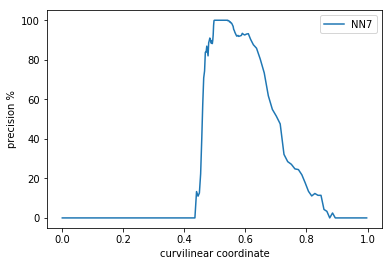

percentage of miss classifications at s = 0.61:  90.30852994555354
standard deviation:  3.8003907108922705




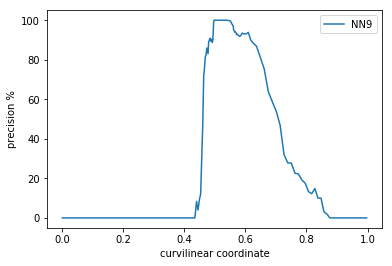

percentage of miss classifications at s = 0.61:  90.12704174228674
standard deviation:  3.8256576778114297




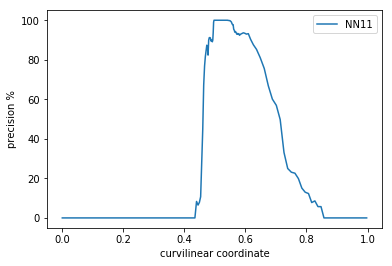

percentage of miss classifications at s = 0.61:  90.31155474894132
standard deviation:  3.5499660091687977




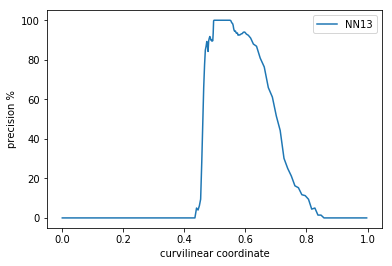

percentage of miss classifications at s = 0.61:  90.99516031457956
standard deviation:  3.281822463737395




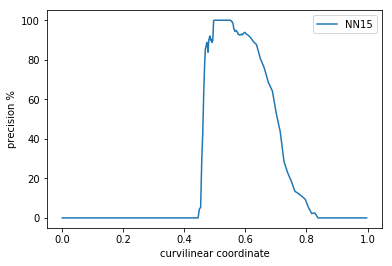

percentage of miss classifications at s = 0.61:  91.17362371445857
standard deviation:  2.8450137156799267




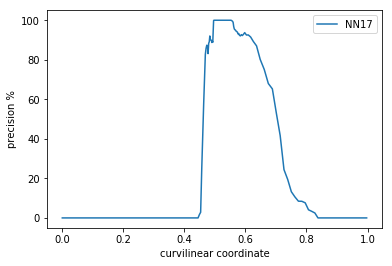

percentage of miss classifications at s = 0.61:  91.52147610405324
standard deviation:  1.9671945514367537




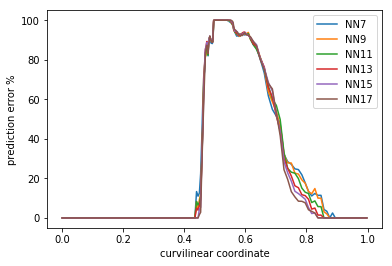

In [3]:
# plotting one figure for each NN algorithm
# x axis curvilinear coordinates
# y axis percentage of missed predictions averaged on all shuffles. Shaded area is standard deviation
# figure on the right shows histogramm at s = 0.6170...
target = 136 # s = 0.6170...

cs     = ['r','b','y','g','k','c']

for i in range(nK):

#     fig, axes = plt.subplots(1,2,gridspec_kw={'width_ratios': [5, 2]},figsize=(9,4))
#     axes[0].plot(curv,errPanel[:,i],label=labels[i])  # error
#     axes[0].fill_between(curv, errPanel[:,i]-std[:,i], errPanel[:,i]+std[:,i],  # fills area according to standard deviation
#         alpha=0.5,color='#e0e0e0')
#     axes[0].legend(loc='upper right')
#     axes[0].set_xlabel('curvilinear coordinate')
#     axes[0].set_ylabel('prediction error %')
#     axes[1].hist(str[target,:,i], bins=10)
#     axes[1].set_xlabel('missed classifications')
# #     plt.savefig('plots_1D/'+labels[i]+'.eps', format='eps')
#     plt.show()
    plt.figure()
    plt.plot(curv,errPanel[:,i],label=labels[i])  # error
#     plt.fill_between(curv, errPanel[:,i]-std[:,i], errPanel[:,i]+std[:,i],  # fills area according to standard deviation
#         alpha=0.5,color='#e0e0e0')
    plt.legend(loc='upper right')
    plt.xlabel('curvilinear coordinate')
    plt.ylabel('precision %')
    plt.savefig('kNN_c/'+labels[i]+'.eps', format='eps')
    plt.show()
    print('percentage of miss classifications at s = 0.61: ',errPanel[target,i])
    print('standard deviation: ',std[target,i])
    print('\n')


# plots single figure comparing all NN algo
plt.figure()
for i in range(nK):
    plt.plot(curv,errPanel[:,i],label=labels[i])

plt.legend(loc='upper right')
plt.xlabel('curvilinear coordinate')
plt.ylabel('prediction error %')
# plt.savefig('plots_1D/NN_comp.eps', format='eps')
plt.show()